In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:////Users/brennancurrie/Desktop/My_Code/My_Repos/sqlalchemy-challenge/Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new modelz
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [9]:
#INSPECTOR 

inspector = inspect(engine)
#inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
        print(column["name"], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
lastdate = session.query(measurement.date).order_by(measurement.date.desc()).first()
lastdate

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results 
# starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

yearago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= yearago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
resultsdf = pd.DataFrame(results, columns= ['Date', 'Precipitation'])

# Sort the dataframe by date
resultsdf.sort_values(by=['Date'])
resultsdf

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-03-12'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2017-01-09'),
  Text(1000.0, 0, '2017-08-14'),
  Text(1500.0, 0, '2017-07-21'),
  Text(2000.0, 0, '2016-12-24'),
  Text(2500.0, 0, '')])

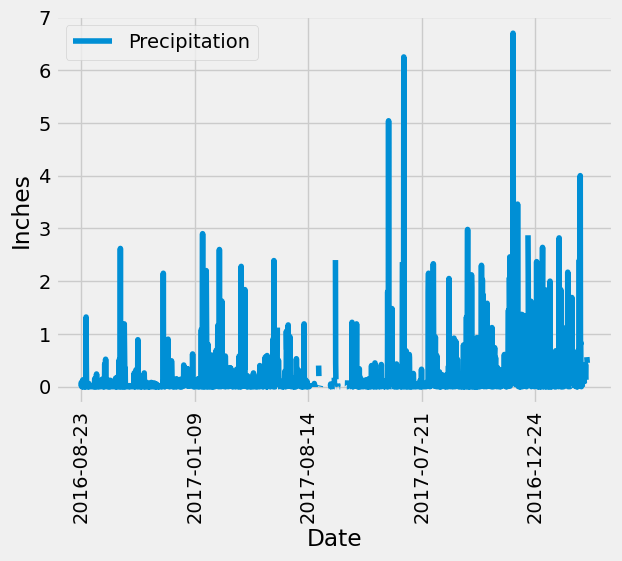

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
resultsdf.plot.line(x='Date', y='Precipitation')
plt.ylabel('Inches')
plt.xticks(rotation=90)

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
resultsdf.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
#INSPECTOR 

inspector = inspect(engine)
#inspector.get_table_names()
columns = inspector.get_columns('station')
for column in columns:
        print(column["name"], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [17]:
session.query(station.station).count()

9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#ANSWER SNIP BELOW

In [19]:
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temps = session.query(measurement).filter(measurement.station == 'USC00519281').all()

emptylist = []
for temp in temps:
        emptylist.append(temp.tobs)
emptylist

from statistics import mean

low = min(emptylist)
high = max(emptylist)
avg = mean(emptylist)

print(low, high, round(avg,2))

54.0 85.0 71.66


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#LOOP METHOD

last12 = session.query(measurement).filter(measurement.station == 'USC00519281').\
            order_by(measurement.date.desc()).limit(365)

emptylistdate = []
emptylisttobs = []
for row in last12:
    emptylistdate.append(row.date)
    emptylisttobs.append(row.tobs)

In [23]:
df = pd.DataFrame({'Date' : emptylistdate, 'Temperature' : emptylisttobs,})
df

,Date,Temperature
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0
...,...,...
360,2016-08-14,76.0
361,2016-08-13,80.0
362,2016-08-12,76.0
363,2016-08-11,80.0


In [24]:
# Using the most active station id, Query the last 12 months of temperature observation data for this
#station and plot the results as a histogram

#LIST COMPRH METHOD

results = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').\
                order_by(measurement.date.desc()).limit(365)



datarows = [{'Date': result[0], 'Temperature' : result[1]} for result in results]

listcomp_df = pd.DataFrame(datarows).set_index('Date')
listcomp_df

,Temperature
Date,
2017-08-18,79.0
2017-08-17,76.0
2017-08-16,76.0
2017-08-15,77.0
2017-08-14,77.0
...,...
2016-08-14,76.0
2016-08-13,80.0
2016-08-12,76.0


array([[<AxesSubplot:title={'center':'Temperature'}>]], dtype=object)

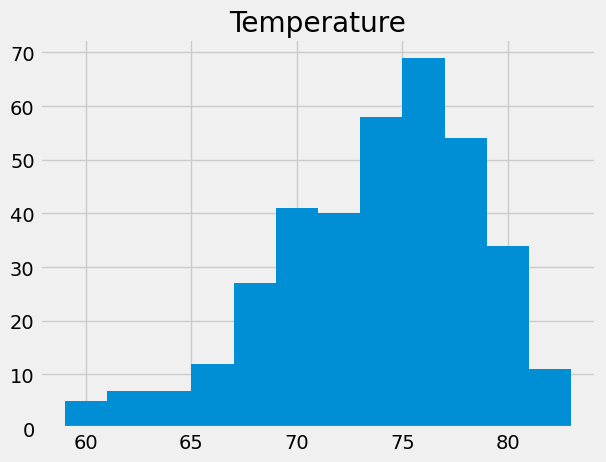

In [25]:
df.hist(bins=12)

In [77]:
#QUERIES BELOW FOR ROUTES ESTABLISHED IN VS STUDIO

from flask import Flask, jsonify 

In [78]:
stationlist = session.query(station.station).all()
#stations = list(np.ravel(stationlist))

stationlist

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [79]:
type(stationlist[0])

sqlalchemy.engine.row.Row

In [80]:
stationlist
emptylist = []
for row in stationlist:
    emptylist.append(row[0])
    
emptylist

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [81]:
type(emptylist[0])

str

In [82]:
results2 = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').\
                order_by(measurement.date.desc()).limit(365)

tobsdict = [{'Date': result[0], 'Temperature' : result[1]} for result in results2]
tobsdict

[{'Date': '2017-08-18', 'Temperature': 79.0},
 {'Date': '2017-08-17', 'Temperature': 76.0},
 {'Date': '2017-08-16', 'Temperature': 76.0},
 {'Date': '2017-08-15', 'Temperature': 77.0},
 {'Date': '2017-08-14', 'Temperature': 77.0},
 {'Date': '2017-08-13', 'Temperature': 77.0},
 {'Date': '2017-08-06', 'Temperature': 83.0},
 {'Date': '2017-08-05', 'Temperature': 82.0},
 {'Date': '2017-08-04', 'Temperature': 77.0},
 {'Date': '2017-07-31', 'Temperature': 76.0},
 {'Date': '2017-07-30', 'Temperature': 81.0},
 {'Date': '2017-07-29', 'Temperature': 82.0},
 {'Date': '2017-07-28', 'Temperature': 81.0},
 {'Date': '2017-07-27', 'Temperature': 76.0},
 {'Date': '2017-07-26', 'Temperature': 75.0},
 {'Date': '2017-07-25', 'Temperature': 77.0},
 {'Date': '2017-07-24', 'Temperature': 75.0},
 {'Date': '2017-07-23', 'Temperature': 82.0},
 {'Date': '2017-07-22', 'Temperature': 77.0},
 {'Date': '2017-07-21', 'Temperature': 77.0},
 {'Date': '2017-07-20', 'Temperature': 77.0},
 {'Date': '2017-07-19', 'Temperatu

In [87]:
startquery = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
            filter(measurement.station == 'USC00519281').filter(measurement.date >= '2017-04-14').limit(365)
startdict = [{'Min': result[0], 'Max' : result[1], 'Avg' : round(result[2],0)} for result in startquery]
startdict

[{'Min': 60.0, 'Max': 83.0, 'Avg': 75.0}]

In [95]:
start = '2016-12-10'
end = '2017-08-05'
startendquery = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station == 'USC00519281').\
                filter(measurement.date >= start).\
                filter(measurement.date <= end).all()

startenddict = [{'Min': result[0], 'Max' : result[1], 'Avg' : round(result[2],0)} for result in startendquery]

print(startenddict)

[{'Min': 59.0, 'Max': 82.0, 'Avg': 72.0}]


In [89]:
# Close Session
session.close()